<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP__Predicting_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# More imports
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [95]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [6]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


# Wrong Method

In [32]:
series = df['close'].values.reshape(-1,1)

# Scaling the Data

In [33]:
print("series's shape before flatten: ", series.shape)
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
print("series's shape after flatten: ", series.shape)



series's shape before flatten:  (1259, 1)
series's shape after flatten:  (1259,)


# Getting the X and Y datas

In [34]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(x)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


# Building the Model

In [35]:
i = Input(shape = (T,1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer = Adam(lr=0.01), loss = 'mse')

# Training the Model

In [41]:
r = model.fit(X[:-N//2], Y[:-N//2], validation_data = (X[-N//2:], Y[-N//2:]), epochs = 80)
# r = model.fit(X[:-N//2], Y[:-N//2],epochs=80,validation_data=(X[-N//2:], Y[-N//2:]),)

Epoch 1/80
39/39 [==============================] - 1s 16ms/step - loss: 1.1099 - val_loss: 0.1048
Epoch 2/80
39/39 [==============================] - 0s 5ms/step - loss: 0.1130 - val_loss: 0.0520
Epoch 3/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0338 - val_loss: 0.0753
Epoch 4/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.0833
Epoch 5/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0194 - val_loss: 0.0566
Epoch 6/80
39/39 [==============================] - 0s 6ms/step - loss: 0.0169 - val_loss: 0.0396
Epoch 7/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0301
Epoch 8/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.0398
Epoch 9/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0243
Epoch 10/80
39/39 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0261
Epoch 11/80
39/39 

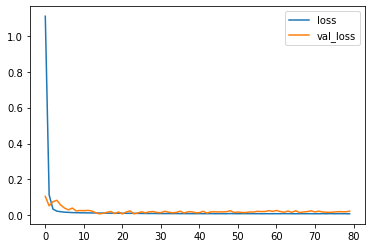

In [42]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1249, 1)


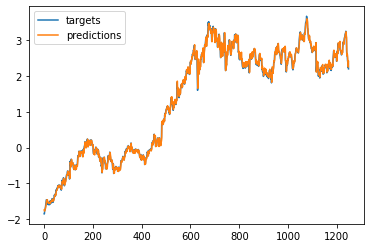

In [46]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.show
plt.legend()

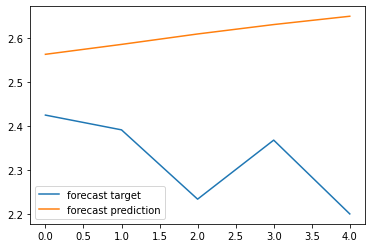

In [48]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [49]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [96]:
df['prev_close'] = df['close'].shift(1)

In [97]:
df['Return'] = (df['close'] - df['prev_close'])/df['close']

In [98]:
df.head()

,date,open,high,low,close,volume,Name,prev_close,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004097
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002133
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007702
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005041


In [57]:
df1 = df.copy()

In [60]:
df1 = df1.dropna()

In [61]:
df1.head()

,date,open,high,low,close,volume,Name,prev_close,Return
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004097
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002133
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007702
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005041
5,2013-02-15,27.805,27.850,27.085,27.170,18195730,SBUX,27.775,-0.022267


In [75]:
df = df.dropna()

In [108]:
series = df['Return'].values[1:].reshape(-1,1)

In [109]:
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [110]:
T = 10
X = []
Y = []
D = 1

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)



In [111]:
i = Input(shape = (T,1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer = Adam(lr=0.01), loss = 'mse')

In [112]:
model.fit(X[:-N//2], Y[:-N//2], validation_data = (X[-N//2:], Y[-N//2:]), epochs = 80)

Epoch 1/80
20/20 [==============================] - 1s 28ms/step - loss: 0.9976 - val_loss: 1.1969
Epoch 2/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9853 - val_loss: 1.2166
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9861 - val_loss: 1.2081
Epoch 4/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9833 - val_loss: 1.2111
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9833 - val_loss: 1.2029
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9828 - val_loss: 1.2108
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9822 - val_loss: 1.1987
Epoch 8/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9825 - val_loss: 1.2078
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9801 - val_loss: 1.2081
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9825 - val_loss: 1.2174
Epoch 11/80
20/20

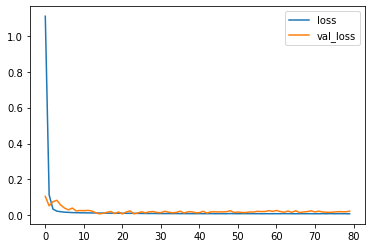

In [113]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1248, 1)


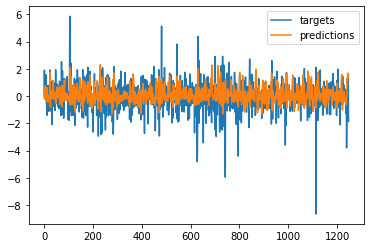

In [114]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

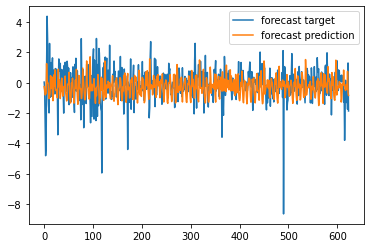

In [125]:
validation_target = series[-N//2:]
validation_prediction = []

x_last = X[-N//2]

while len(validation_target) > len(validation_prediction):
  p = model.predict(x_last.reshape(-1,1,1))[0,0]
  validation_prediction.append(p)
  np.roll(x_last, -1)
  x_last[-1] = p


plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [128]:
X[1]

array([[ 0.09292955],
       [-0.73383628],
       [-0.51010314],
       [-1.95825609],
       [ 0.0834511 ],
       [-1.88403973],
       [-0.0233474 ],
       [ 1.18615182],
       [-1.60304309],
       [ 0.02406898]])